
Importando os pacotes e selecionando os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('aluguel.csv', delimiter=';')
df['valor_aluguel'] /= 1000 #divisão opcional por mil para facilitar a leitura do eqm à frente
df = df.drop(columns=['valor_total']) # convém excluir esta variável que não devemos considerar para os fins de predição do 'valor_aluguel',
# posto que a correlação é espúria.
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'aluguel.csv'

Opção que terá impacto: identificar e remover outliers
(serão comparados ao fim os resultados com e sem estas remoções).


In [ ]:
df_sorted = df.sort_values(by='area', ascending=False)
df_sorted.head(30)

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro
2396,Belo Horizonte,46335,4,8,5,11,1,1,960,8.500,646,114
5912,São Paulo,24606,5,4,4,12,1,0,2254,8.100,7859,103
9235,Campinas,12732,3,2,0,3,1,0,700,1.600,96,21
8784,Belo Horizonte,2000,3,3,2,2,1,1,3000,5.000,200,67
5126,Belo Horizonte,2000,4,2,3,0,1,0,0,4.956,200,82
654,São Paulo,1600,6,6,6,0,1,1,0,7.600,1834,115
4810,São Paulo,1600,4,5,12,0,1,0,1,6.900,5000,104
3556,São Paulo,1100,4,6,10,0,1,0,3000,14.000,2000,211
2422,Belo Horizonte,1020,5,4,6,0,1,1,0,6.520,654,107
640,Belo Horizonte,1000,5,7,8,0,1,0,0,14.980,1904,246


In [ ]:
df = df.drop(df_sorted.head(7).index)


Avaliação de contagens e percentuais da variável 'cidade' para dummização e consideração em uma última etapa:



In [ ]:
contagem = df['cidade'].value_counts(dropna=False)
percent = df['cidade'].value_counts(dropna=False, normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=False)

,contagem,%
cidade,,
São Paulo,5880,0.550665
Rio de Janeiro,1500,0.140476
Belo Horizonte,1253,0.117344
Porto Alegre,1193,0.111725
Campinas,852,0.079790


Dummizando a variável 'cidade'. O código abaixo automaticamente fará:
a)o estabelecimento de dummies que representarão cada uma das cidades no dataset;
b)removerá a variável original a partir da qual houve a dummização;
c)estabelecerá como categoria de referência a primeira categoria, ou seja, a categoria 'Belo_Horizonte' por meio do argumento 'drop_first=True'.

In [ ]:
df = pd.get_dummies(df, columns=['cidade'], drop_first=True)
dummies_bool = ['cidade_Campinas', 'cidade_Porto Alegre', 'cidade_Rio de Janeiro', 'cidade_São Paulo']
df[dummies_bool] = df[dummies_bool].astype(int)
df.head(10)

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
0,70,2,1,1,7,1,1,2065,3.300,211,42,0,0,0,1
1,320,4,4,0,20,1,0,1200,4.960,1750,63,0,0,0,1
2,80,1,1,1,6,1,0,1000,2.800,0,41,0,1,0,0
3,51,2,1,0,2,1,0,270,1.112,22,17,0,1,0,0
4,25,1,1,0,1,0,0,0,0.800,25,11,0,0,0,1
5,376,3,3,7,0,1,0,0,8.000,834,121,0,0,0,1
6,72,2,1,0,7,1,0,740,1.900,85,25,0,0,1,0
7,213,4,4,4,4,1,0,2254,3.223,1735,41,0,0,0,1
8,152,2,2,1,3,1,1,1000,15.000,250,191,0,0,0,1
9,35,1,1,0,2,1,1,590,2.300,35,30,0,0,1,0


Dividindo os dados em conjunto de treinamento e teste:
Vamos dividir nossos dados apenas uma vez tomando o X como todas as potenciais variáveis explicativas.
Assim, faremos as seleções das variáveis somente quando estivermos atibuindo os modelos.

In [ ]:
X = df.drop('valor_aluguel', axis=1)
y = df['valor_aluguel'] #nossa variável dependente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

NameError: name 'df' is not defined

PRIMEIRO MODELO - apenas 'área' como variável explicativa


In [ ]:
model_area = LinearRegression()
model_area.fit(X_train[['area']], y_train)

LinearRegression()

Plotagem do primeiro modelo:

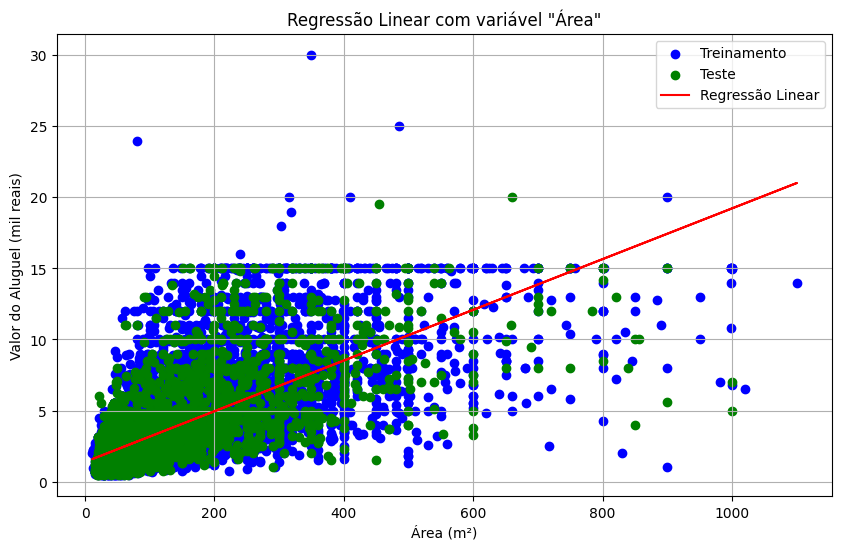

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['area'], y_train, color='blue', label='Treinamento')
plt.scatter(X_test['area'], y_test, color='green', label='Teste')
plt.plot(X_train['area'], model_area.predict(X_train[['area']]), color='red', label='Regressão Linear')
plt.title('Regressão Linear com variável "Área"')
plt.xlabel('Área (m²)')
plt.ylabel('Valor do Aluguel (mil reais)')
plt.legend()
plt.grid(True)
plt.show()


Avaliando o modelo usando EQM no conjunto de teste


In [ ]:
y_pred = model_area.predict(X_test[['area']])
mse_area = mean_squared_error(y_test, y_pred)
print("EQM no conjunto de teste usando apenas a variável 'Área':", mse_area)


EQM no conjunto de teste usando apenas a variável 'Área': 5.8407209958093


Adicionando yhat e EQM ao DataFrame original

In [ ]:
df['yhat1'] = model_area.predict(df[['area']])
df['eqm1'] = (df['valor_aluguel'] - df['yhat1']) ** 2


SEGUNDO MODELO - incluindo a variavel 'mobiliaria':


In [ ]:
model_both = LinearRegression()
model_both.fit(X_train[['area', 'mobiliaria']], y_train)

y_pred_both = model_both.predict(X_test[['area', 'mobiliaria']])
mse_both = mean_squared_error(y_test, y_pred_both)
print("EQM no conjunto de teste usando as variáveis 'Área' e 'Mobiliaria':", mse_both)

df['yhat2'] = model_both.predict(df[['area', 'mobiliaria']])
df['eqm2'] = (df['valor_aluguel'] - df['yhat2']) ** 2


EQM no conjunto de teste usando as variáveis 'Área' e 'Mobiliaria': 5.468956000145342


TERCEIRO MODELO - incluindo a variável 'quartos':


In [ ]:
model_three = LinearRegression()
model_three.fit(X_train[['area', 'mobiliaria', 'quartos']], y_train)

y_pred_three = model_three.predict(X_test[['area', 'mobiliaria', 'quartos']])
mse_three = mean_squared_error(y_test, y_pred_three)
print("EQM no conjunto de teste usando as variáveis 'Área', 'Mobiliaria' e 'Quartos':", mse_three)

df['yhat3'] = model_three.predict(df[['area', 'mobiliaria', 'quartos']])
df['eqm3'] = (df['valor_aluguel'] - df['yhat1']) ** 2


EQM no conjunto de teste usando as variáveis 'Área', 'Mobiliaria' e 'Quartos': 5.359866655265364


Comparação dos três modelos requisitados a partir do EQM.
Rodamos também os modelos sem a exclusão de outliers e incluímos no gráfico os EQMs respectivos:

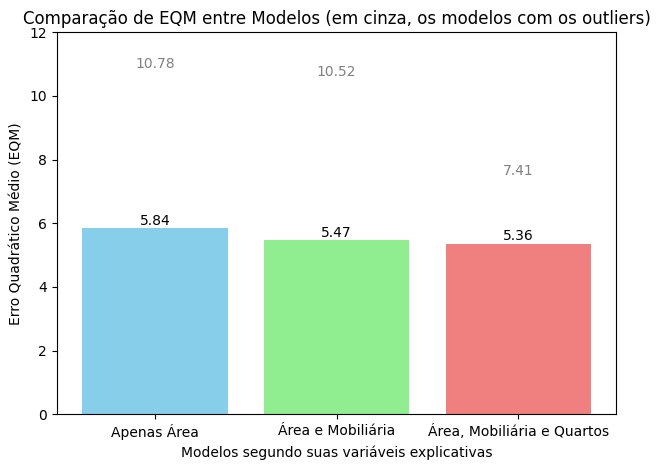

In [ ]:
# EQMs resultantes
model_names = ['Apenas Área', 'Área e Mobiliária', 'Área, Mobiliária e Quartos']
mse_values = [mse_area, mse_both, mse_three]

# EQMs resultantes se não tivessem sido excluídos no início os outliers, em cinza no gráfico
mse_values_controlled = [10.78, 10.52, 7.41]

plt.bar(model_names, mse_values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.ylim(0, 12)
for i in range(len(model_names)):
    plt.text(i, mse_values[i] + 0.1, str(round(mse_values[i], 2)), ha='center')
    plt.text(i, mse_values_controlled[i] + 0.1, str(round(mse_values_controlled[i], 2)), ha='center', color='gray')
plt.xlabel('Modelos segundo suas variáveis explicativas')
plt.ylabel('Erro Quadrático Médio (EQM)')
plt.title('Comparação de EQM entre Modelos (em cinza, os modelos com os outliers)')

plt.tight_layout()
plt.show()


Questão: seria pertinente incluir como explicativas as demais variáveis?
Para responder a esta questão, podemos gerar a matriz de correlações do dataset para avaliar quais variáveis têm correlação estatisticamente significante com 'valor_alugel' todas as que tiverem serão consideradas adequadas à nossa predição. Evidentemente desconsideraremos as variáveis inclusas posteriormente em df.


In [ ]:
import pingouin as pg #pode ser necessário o comando pip install!

correlacoes = pg.rcorr(df, method='pearson',
                 upper='pval', decimals=4,
                 pval_stars={0.01: '***',
                             0.05: '**',
                             0.10: '*'})
print(correlacoes)


                          area  quartos banheiros vagas_garagem    andar  \
area                         -      ***       ***           ***      ***   
quartos                 0.7088        -       ***           ***      ***   
banheiros               0.7733   0.7342         -           ***            
vagas_garagem           0.7013   0.6175    0.6973             -       **   
andar                   -0.109  -0.0913    0.0064       -0.0241        -   
aceita_animal           0.1286   0.1712    0.1182        0.1267  -0.0272   
mobiliaria             -0.0122  -0.0814    0.0171       -0.0052    0.123   
valor_condominio        0.3162   0.2767    0.4014        0.2859   0.3329   
valor_aluguel            0.682   0.5438    0.6697        0.5787   0.0868   
valor_iptu              0.5587   0.4007    0.5073        0.4632   0.0612   
valor_seguro            0.7182   0.5678    0.6781        0.5981   0.0185   
cidade_Campinas        -0.0406  -0.0379   -0.0575       -0.0087  -0.0419   
cidade_Porto

E concluímos pelas pval_stars que todas as variáveis são admissíveis no modelo com uma significância de 0.01.


QUARTO MODELO - incluindo todas as variáveis, inclusive as dummies de cidade que contribuíram para o desempenho do modelo:

In [ ]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

y_pred_all = model_all.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
print("EQM no conjunto de teste usando todas as variáveis:", mse_all)

#Note como nosso EQM abaixou.


EQM no conjunto de teste usando todas as variáveis: 0.13819006283984922


Por fim, comparamos o desempenho de todas as regressões propostas:


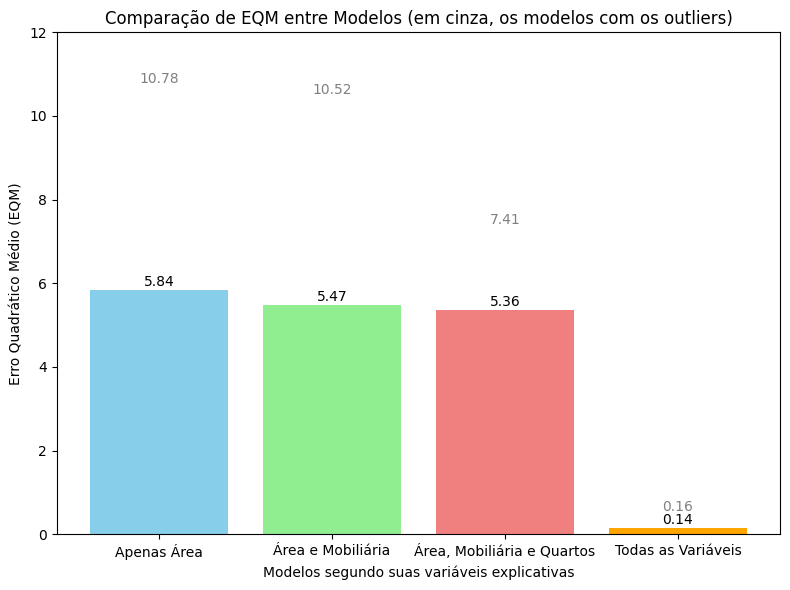

In [ ]:
# EQMs resultantes
model_names = ['Apenas Área', 'Área e Mobiliária', 'Área, Mobiliária e Quartos', 'Todas as Variáveis']
mse_values = [mse_area, mse_both, mse_three, mse_all]
mse_values_controlled = [10.78, 10.52, 7.41, 0.16]
plt.figure(figsize=(8, 6))

plt.bar(model_names, mse_values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.ylim(0, 12)
for i in range(len(model_names)):
    plt.text(i, mse_values[i] + 0.1, str(round(mse_values[i], 2)), ha='center')
    if model_names[i] == 'Todas as Variáveis':
        plt.text(i, mse_values_controlled[i] + 0.40, str(round(mse_values_controlled[i], 2)), ha='center', color='gray')
    else:
        plt.text(i, mse_values_controlled[i], str(round(mse_values_controlled[i], 2)), ha='center', color='gray')
plt.xlabel('Modelos segundo suas variáveis explicativas')
plt.ylabel('Erro Quadrático Médio (EQM)')
plt.title('Comparação de EQM entre Modelos (em cinza, os modelos com os outliers)')

plt.tight_layout()
plt.show()


Conclusão:

Com o decréscimo constante do EQM, mostrou-se que o acréscimo requisitado das variáveis seguidamente contribuiu para o desempenho de nossas predições nos dados de teste – e de modo mais enfático sem a exclusão de outliers.

Com efeito, após atestarmos a significância estatística da correlação de todas as variáveis do dataset com nossa variável dependente, inclusive as dummizadas variáveis atinentes à cidade de cada imóvel, pudemos comprovar que o melhor modelo para fins de predição é o último, o qual inclui todas as variáveis – exceto a variável 'valor_total', que admitimos como espuriamente correlata, além de indisponível quando a finalidade for decidir que valor atribuir a um aluguel.

Ademais, está patente a discrepância dos EQMs apresentados pelas colunas do nosso gráfico com relação aos valores em cinza para os mesmos modelos sem exclusão de outliers. Assim, entendemos como uma escolha correta nossa remoção dos outliers, ainda que na última regressão o aumento no desempenho não tenha sido comparativamente tão elevado.

É conclusivo que utilizando todas as variáveis disponíveis sobre o imóvel em questão, a predição do valor de seu aluguel será mais realista e atenderá melhor às necessidades do cliente.